In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import os
%matplotlib inline

In [2]:
pp = '/home/marco/PycharmProjects/ini_caltech101/'

In [13]:
pp = 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\'

In [23]:
import json
import matplotlib.ticker as mtick

fmt = '%3.f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
                             
def plot(history_jsons, nb_epochs=10, leg_locs=['upper right', 'lower right']):
    
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    fig.suptitle('{}-fold Cross-Validation'.format(len(history_jsons)), fontsize=24, fontweight='bold')
    
    all_val_class_acc = np.zeros((len(history_jsons,)))
    all_test_class_acc = np.zeros((len(history_jsons,)))
    
    for i, history_json in enumerate(history_jsons):
        
        with open(history_json) as data_file:    
            data = json.load(data_file)
    
        all_val_class_acc[i] = np.mean(data['val_class_acc'],axis=1)[:nb_epochs][nb_epochs-1]
        current_test_class_acc = np.mean(data['test_class_acc'],axis=1)[:nb_epochs]
        all_test_class_acc[i] = current_test_class_acc
        

        mean_loss = np.mean(data['loss'], axis=1)[:nb_epochs]
        mean_val_loss = np.mean(data['val_loss'], axis=1)[:nb_epochs]
        mean_acc = np.mean(data['acc'], axis=1)[:nb_epochs]
        mean_val_acc = np.mean(data['val_acc'], axis=1)[:nb_epochs]
        mean_val_class_acc = np.mean(data['val_class_acc'], axis=1)[:nb_epochs]
        
        epochs = range(nb_epochs)


        # plotting
        linewidth=2.0
        if i == 0:
            axs[0].plot(epochs, mean_val_loss, 'k:', label='Validation loss', linewidth=linewidth)

            axs[1].plot(epochs, mean_val_class_acc, 'k:', label='Validation accuracy', linewidth=linewidth)
        else:
            axs[0].plot(epochs, mean_val_loss, 'k:', linewidth=linewidth)

            axs[1].plot(epochs, mean_val_class_acc, 'k:', linewidth=linewidth)


    # Now add the legend with some customizations.
    for ax, leg_loc in zip([axs[0], axs[1]], leg_locs):
        ax.set_xlabel('Epoch', fontsize=20)
        ax.tick_params(labelsize=18)
        
        legend = ax.legend(loc=leg_loc)

        # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
        frame = legend.get_frame()
        frame.set_facecolor('0.90')

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize(20)

        for label in legend.get_lines():
            label.set_linewidth(3)  # the legend line width
    
    axs[0].set_ylabel('Cross-Entropy Loss', fontsize=24)
    
    axs[1].set_ylabel('Accuracy', fontsize=24)
    axs[1].set_ylim(0, 1.0)
    vals = axs[1].get_yticks()
    axs[1].set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    
    print 'mean val class accuracy: ', np.mean(all_val_class_acc)
    print 'mean test class accuracy: ', np.mean(all_test_class_acc)
    
    return fig

In [14]:
histories = [
    os.path.join(pp,'results\\2015-12-24_11.42.42_class-weight-auto_bn_triangluar_cv0_e10_history.json'),
    os.path.join(pp,'results\\2015-12-23_05.16.59_testing_class-weight-auto_bn_triangluar_cv1_e20_history.json'),
    os.path.join(pp,'results\\2015-12-25_13.00.19_class-weight-auto_bn_triangluar_cv2_e10_history.json'),
    os.path.join(pp,'results\\2015-12-26_00.02.48_class-weight-auto_bn_triangluar_cv3_e10_history.json'),
    os.path.join(pp,'results\\2015-12-26_13.34.21_class-weight-auto_bn_triangluar_cv4_e10_history.json'),
    os.path.join(pp,'results\\2015-12-26_17.35.03_class-weight-auto_bn_triangluar_cv5_e10_history.json'),
    os.path.join(pp,'results\\2015-12-27_01.02.10_class-weight-auto_bn_triangluar_cv6_e10_history.json'),
    os.path.join(pp,'results\\2015-12-27_14.43.11_class-weight-auto_bn_triangluar_cv7_e10_history.json'),
    os.path.join(pp,'results\\2015-12-27_18.15.27_class-weight-auto_bn_triangluar_cv8_e10_history.json'),
    os.path.join(pp,'results\\2015-12-27_22.13.53_class-weight-auto_bn_triangluar_cv9_e10_history.json')]

In [20]:
histories

['C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-24_11.42.42_class-weight-auto_bn_triangluar_cv0_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-23_05.16.59_testing_class-weight-auto_bn_triangluar_cv1_e20_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-25_13.00.19_class-weight-auto_bn_triangluar_cv2_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-26_00.02.48_class-weight-auto_bn_triangluar_cv3_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-26_13.34.21_class-weight-auto_bn_triangluar_cv4_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-26_17.35.03_class-weight-auto_bn_triangluar_cv5_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjects\\ini_caltech101\\results\\2015-12-27_01.02.10_class-weight-auto_bn_triangluar_cv6_e10_history.json',
 'C:\\Users\\Marco\\PycharmProjec

mean val class accuracy:  0.822125035967
mean test class accuracy:  0.820982309153


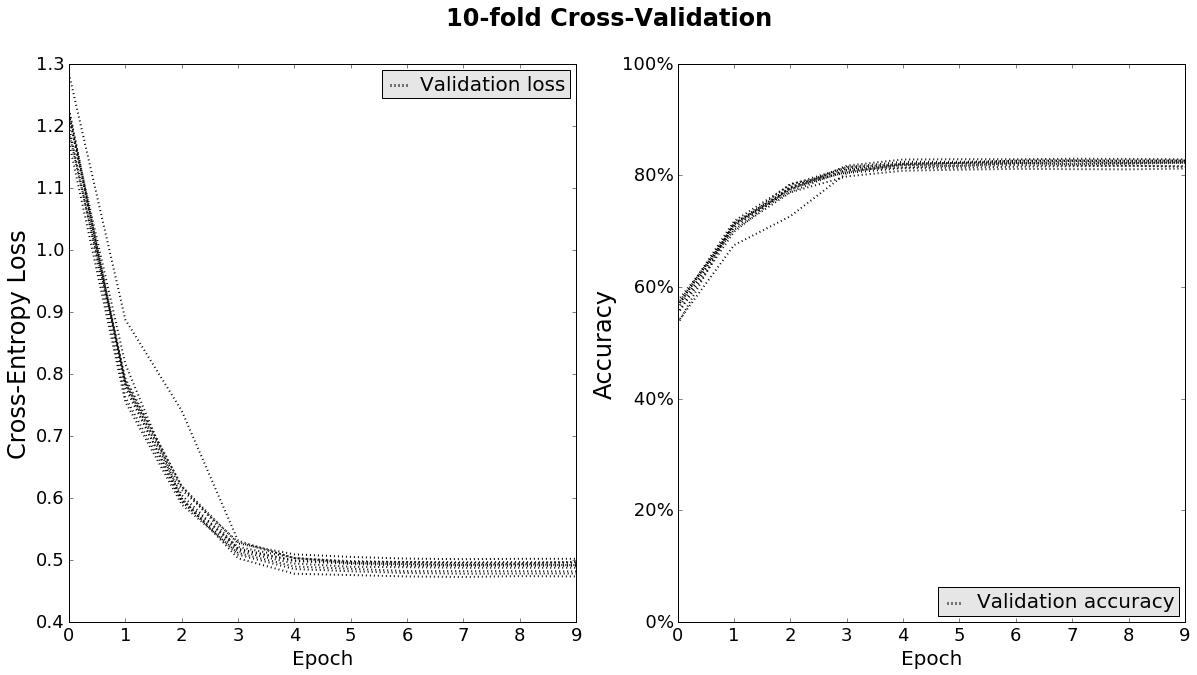

In [24]:
fig = plot(histories)
#fig.savefig(pp + 'report/images/cross-val.png')